Load dataset to df

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import datetime
import urllib
import calendar
import time

from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


df=pd.read_pickle('311_Requests.pickle')

df.columns.values

coord=df[['lat','lon','requested_datetime']].dropna()


coord=coord.reset_index()
ind=np.asarray(coord['service_request_id'])
del coord['service_request_id']

coord=np.asarray(coord)
#coord[:10]

import pyproj as proj

# setup your projections
crs_wgs = proj.Proj(init='epsg:4326') # assuming you're using WGS84 geographic
crs_bng = proj.Proj(init='epsg:26917') # use a locally appropriate projected CRS

# then cast your geographic coordinate pair to the projected system
coord[:,0],coord[:,1]=proj.transform(crs_wgs, crs_bng, coord[:,1], coord[:,0])

from sklearn.preprocessing import normalize
coord[:,0] = (coord[:,0] - coord[:,0].min()) / (coord[:,0].max() - coord[:,0].min())
coord[:,1] = (coord[:,1] - coord[:,1].min()) / (coord[:,1].max() - coord[:,1].min())

In [196]:
df.columns.values

array([u'address', u'agency_responsible', u'expected_datetime', u'lat',
       u'lon', u'media_url', u'requested_datetime', u'service_code',
       u'service_name', u'service_notice', u'shape', u'status',
       u'updated_datetime', u'zipcode'], dtype=object)

In [197]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()
coord[:,2]=scl.fit_transform([time.mktime(z.timetuple()) for z in coord[:,2]])



C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


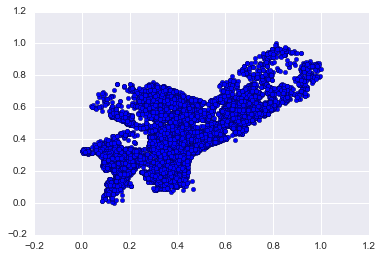

In [198]:
plt.scatter(coord[:,0],coord[:,1])

In [201]:
X=coord#[:,:2]
db = DBSCAN(eps=0.004, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [202]:
print(n_clusters_)

14


In [204]:
lbls=pd.DataFrame({'nclus':labels},index=ind)
lbls.index.name='service_request_id'

clasf=pd.concat([lbls,df.loc[:,['address', 'agency_responsible', 'expected_datetime', 'requested_datetime',
       'service_name', 'service_notice',
       'updated_datetime','status']]],axis=1)
clasf=clasf[clasf.nclus>=0]
from IPython.display import display, HTML
#for i in range(n_clusters_):
#    display(clasf[clasf.nclus==i])
clasf.sort_values('nclus',inplace=True)

clasf.to_csv('clusters_utf.csv',encoding='utf-8')

import codecs
tstf = codecs.open('clusters_utf.csv', 'r', encoding='ascii', errors='ignore')
tst=pd.read_csv(tstf,index_col='service_request_id')
tst.to_html('clusters.html')
tstf.close()

In [212]:
fulldf=pd.concat([lbls,df],axis=1)
fulldf=fulldf[fulldf.nclus>=0]

,nclus,address,agency_responsible,expected_datetime,lat,lon,media_url,requested_datetime,service_code,service_name,service_notice,shape,status,updated_datetime,zipcode
service_request_id,,,,,,,,,,,,,,,
10920421,0.0,1618 FAIRMOUNT AVE,Community Life Improvement Program,2016-09-12 20:00:00,39.967131,-75.164426,NaN,2016-09-03 16:50:39,SR-CL01,Graffiti Removal,7 Business Days,"{u'type': u'Point', u'coordinates': [-75.16442...",Closed,2016-09-08 08:18:38,NaN
10920422,0.0,1606 FAIRMOUNT AVE,Community Life Improvement Program,2016-09-12 20:00:00,39.967126,-75.164037,NaN,2016-09-03 16:53:19,SR-CL01,Graffiti Removal,7 Business Days,"{u'type': u'Point', u'coordinates': [-75.16403...",Closed,2016-09-08 08:10:38,NaN
10920423,0.0,1600 FAIRMOUNT AVE,Community Life Improvement Program,2016-09-12 20:00:00,39.967124,-75.163897,NaN,2016-09-03 16:55:10,SR-CL01,Graffiti Removal,7 Business Days,"{u'type': u'Point', u'coordinates': [-75.16389...",Closed,2016-09-08 08:10:17,NaN
10920424,0.0,N 16TH ST & FAIRMOUNT AVE,Community Life Improvement Program,2016-09-12 20:00:00,39.967127,-75.163743,NaN,2016-09-03 16:57:24,SR-CL01,Graffiti Removal,7 Business Days,"{u'type': u'Point', u'coordinates': [-75.16374...",Closed,2016-09-08 08:19:03,NaN
10920425,0.0,1540 FAIRMOUNT AVE,Community Life Improvement Program,2016-09-12 20:00:00,39.967119,-75.163648,NaN,2016-09-03 16:59:23,SR-CL01,Graffiti Removal,7 Business Days,"{u'type': u'Point', u'coordinates': [-75.16364...",Closed,2016-09-08 08:20:25,NaN


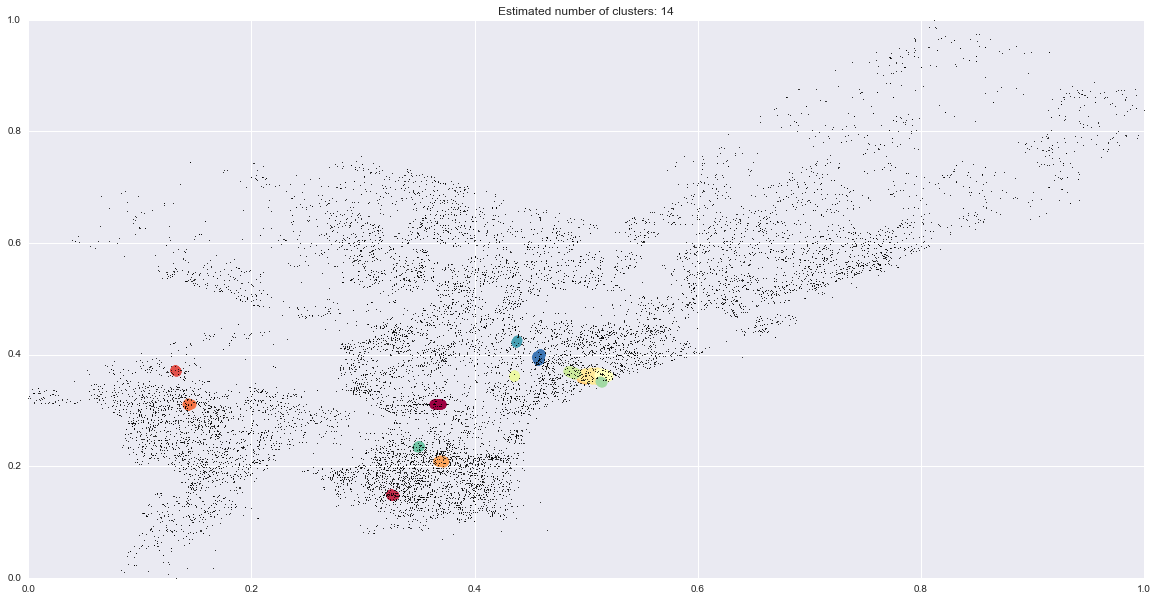

In [208]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
plt.figure(figsize=(20,10))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=1)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [85]:
list(df['service_name'].unique())

['Sanitation / Dumpster Violation',
 'Illegal Dumping',
 'Rubbish/Recyclable Material Collection',
 'Dead Animal in Street',
 'Graffiti Removal',
 'Street Defect',
 'Information Request',
 'Directory Assistance',
 'Zoning Business',
 'Abandoned Vehicle',
 'Street Trees',
 'Street Light Outage',
 'Smoke Detector',
 'Vacant House or Commercial',
 'Alley Light Outage',
 'Parks and Rec Safety and Maintenance',
 'Miscellaneous',
 'Construction Site Task Force',
 'Stop Sign Repair',
 'Complaint (Streets)',
 'Vacant Lot Clean-Up',
 'Inlet Cleaning',
 'Hydrant Request',
 'Other (Streets)',
 'Maintenance Residential or Commercial',
 'Building Construction',
 'Zoning Residential',
 'Police Complaint',
 'Building Dangerous',
 'License Residential',
 'Infestation Residential',
 'Traffic (Other)',
 'Manhole Cover',
 'Traffic Signal Emergency',
 'Dangerous Sidewalk',
 'Street Paving',
 'Abandoned Bike',
 'Boarding Room House',
 'Fire Residential or Commercial',
 'Salting',
 'Daycare Residential or C

## Top10 problems by each department for last week

In [86]:
df=df.set_index('requested_datetime')

In [87]:
df.index = df.index.sort_values(ascending=False)
today = datetime.datetime.now()

Current month and week

In [81]:
df_week=df.loc[today:today - pd.Timedelta(days=7)].reset_index()
df_cmonth=df.loc[today:today - pd.Timedelta(days=30)].reset_index()

In [31]:
df.loc[lastdayfrom - pd.Timedelta(days=30):lastdayfrom].reset_index()

datetime.datetime(2016, 9, 27, 16, 39, 34, 504929)

In [133]:
agencies=df['agency_responsible'].unique()

In [141]:
agencies = df_week.groupby(['agency_responsible']).count()['zipcode'].sort_values(ascending=False)[:15]

In [147]:
agencies

agency_responsible
License & Inspections                 832
Streets Department                    608
Community Life Improvement Program    122
Police Department                      90
Parks & Recreation                     60
First Judicial District/Courts         50
Philly311 Contact Center               39
Directory Assistance                   34
Water Department (PWD)                 27
Fire Department                        16
Revenue                                16
Department of Public Health            16
Department of Records                  14
City Council                           13
Register of Wills/ Orphans Court        9
Name: zipcode, dtype: int64

In [134]:
for i in agencies:
    print('Agency:',i)

Agency: Streets Department
Agency: Community Life Improvement Program
Agency: Philly311 Contact Center
Agency: nan
Agency: First Judicial District/Courts
Agency: Directory Assistance
Agency: License & Inspections
Agency: Department of Records
Agency: Office of Property Assessment- OPA
Agency: Water Department (PWD)
Agency: City Controller
Agency: Managing Director's Office- MDO
Agency: Probation/Parole
Agency: Register of Wills/ Orphans Court
Agency: Office of the Director of Finance
Agency: City Council
Agency: Police Department
Agency: Office of Housing & Community Development- OHCD
Agency: Department of Public Health
Agency: Office of Human Resources- OHR
Agency: Parks & Recreation
Agency: State/Federal Government Offices
Agency: Office of Arts, Culture & Creative Economy- OACCE
Agency: Revenue
Agency: Fire Department
Agency: Mayor's Office
Agency: Water Revenue
Agency: Law Department/ City Solicitor
Agency: Office of Homeless Services - OHS
Agency: City Commissioners Office
Agency:

In [6]:
df.groupby('Service Notice').count()['Zipcode'].sort_values(ascending=False)[:10]

Service Notice
None                242218
20 Business Days     28311
2 Business Days      15459
5 Business Days      14302
3 Business Days      10888
30 Business Days      7707
90 Business Days      4547
60 Business Days      3812
15 Business Days      3692
10 Business Days      3328
Name: Zipcode, dtype: int64

In [23]:
pd.to_datetime(df_ss['Updated Date/Time'])-pd.to_datetime(df_ss['Requested Date/Time'])

0       1 days 16:59:45
1       1 days 17:53:38
2       1 days 16:37:51
3       1 days 16:44:10
4       1 days 15:39:01
5       1 days 14:56:57
6       1 days 13:58:10
7       1 days 22:03:26
8       1 days 21:53:42
9       1 days 20:41:31
10      1 days 19:02:04
11      1 days 17:13:27
12      1 days 17:01:38
13      1 days 17:01:39
14      1 days 15:49:21
15      1 days 15:44:21
16      1 days 13:31:43
17      1 days 10:34:24
18      1 days 21:41:24
19      1 days 21:41:24
20      1 days 21:10:45
21      1 days 21:00:45
22      1 days 20:56:28
23      1 days 20:20:01
24      1 days 23:21:41
25      5 days 13:47:20
26      2 days 21:18:38
27      2 days 21:22:37
28      3 days 15:58:02
29      3 days 15:56:27
             ...       
470     0 days 00:00:28
471     0 days 00:00:10
472     0 days 00:00:10
473    33 days 03:06:15
474     0 days 00:12:40
475     0 days 00:03:04
476     0 days 00:00:19
477     0 days 18:05:12
478     0 days 00:00:21
479     0 days 00:01:36
480     0 days 0